In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan)

In [2]:
data = np.loadtxt("nr_05.42.12_1372.dat", unpack=True)
print(data[0])

[ 47.376694  47.76738   47.900711  48.395142  48.196556  48.967846
  48.927097  48.792095  48.660675  48.205925  47.758343  47.673759
  47.808128  47.621334  47.578667  47.697033  47.809361  47.852852
  48.002285  48.077709  48.489822  48.246601  48.323864  47.827225
  48.043564  47.720226  47.784035  47.83065   48.494827  49.228371
  49.393417  50.083012  51.227398  52.124947  51.659389  51.837978
  52.240959  52.381649  52.151775  52.162701  52.479095  52.508686
  51.686649  51.160439  51.567001  51.395714  50.981205  50.919872
  50.947788  50.566856  49.820957  49.415237  49.128227  48.962479
  48.74654   48.705246  48.522915  48.233456  48.218468  47.992283
  47.540112  47.173645  47.439678  47.434292  47.837261  47.873188
  47.635979  47.538315  47.378265  47.704041  47.543907  47.902073
  48.720104  49.140945  49.357006  49.152821  49.185532  48.688862
  48.55777   48.312786  48.547718  48.779186  48.105572  47.757454
  47.87352   46.873486  46.298134  46.914532  46.70451   46.73

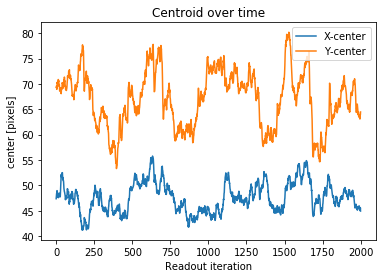

In [3]:
plt.plot (data[0], label="X-center")
plt.plot (data[1], label="Y-center")
plt.legend()
plt.title ("Centroid over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("center [pixels]")
plt.savefig (" nr_05.42.12_1372-xycentroid.png")

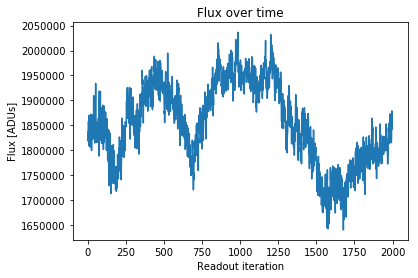

In [4]:
plt.figure()
plt.plot (data[2])
plt.title("Flux over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Flux [ADUs]")
plt.savefig (" nr_05.42.12_1372-flux.png")

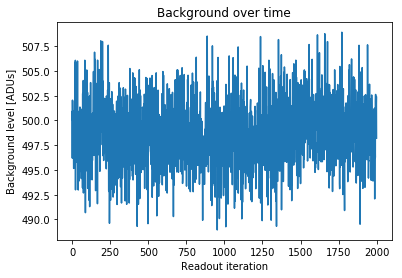

In [5]:
plt.figure()
plt.plot (data[3])
plt.title("Background over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Background level [ADUs]")
plt.savefig (" nr_05.42.12_1372-background.png")

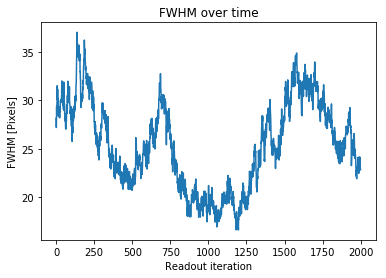

In [6]:
plt.figure()
plt.plot (data[4])
plt.title("FWHM over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("FWHM [Pixels]")
plt.savefig (" nr_05.42.12_1372-fwhm.png")

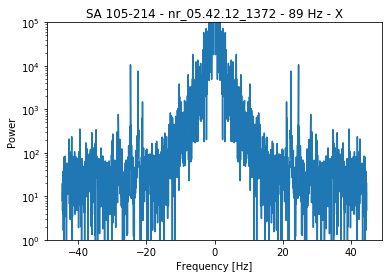

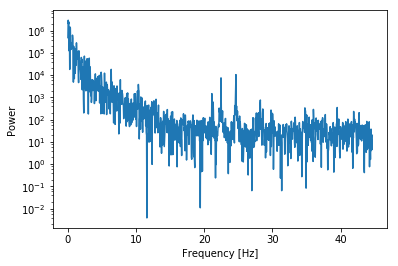

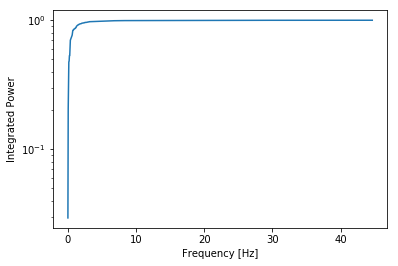

In [7]:
indata = data[0]# - np.mean (data[0])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.011196 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nr_05.42.12_1372 - 89 Hz - X")
plt.savefig (" nr_05.42.12_1372-powerspectrum.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig (" nr_05.42.12_1372-power.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig (" nr_05.42.12_1372-integratedpower.png")

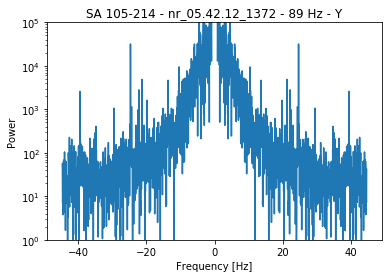

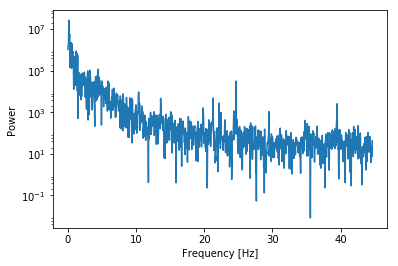

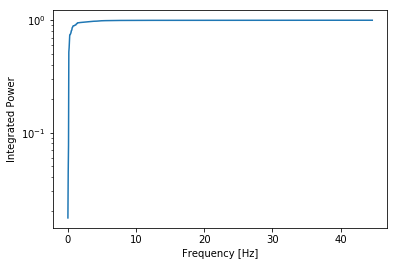

In [8]:
indata = data[1]# - np.mean (data[1])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.011196 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nr_05.42.12_1372 - 89 Hz - Y")
plt.savefig (" nr_05.42.12_1372-powerspectrum-y.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig (" nr_05.42.12_1372-power-y.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig (" nr_05.42.12_1372-integratedpower-y.png")